In [1]:
import pickle
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%run -i 0_functions.py

In [4]:
all_subsets_hvg = []
division = 5
for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_mono_subset{j}_hvg.h5ad")
        print(dataset.n_obs)
        all_subsets_hvg.append(dataset)

for i in [1, 2, 3]:
    for j in range(division):
        dataset = read_with_pc(f"data/rep{i}_ery_subset{j}_hvg.h5ad")
        print(dataset.n_obs)
        all_subsets_hvg.append(dataset)

744
744
744
744
744
758
758
758
758
758
1386
1386
1386
1386
1386
422
422
422
422
422
640
640
640
640
640
558
558
558
558
558


In [13]:
import dynchro
import numpy as np
from tqdm.notebook import tqdm


def run_dynchro(datasets, diag, unique = False):
    distances = [[0 for i in range(len(all_subsets_hvg))] for j in range(len(all_subsets_hvg))]
    distances_normalised = [[0 for i in range(len(all_subsets_hvg))] for j in range(len(all_subsets_hvg))]

    for i1 in tqdm(range(len(datasets))):
        d1 = datasets[i1]
        d1 = d1[np.argsort(d1.obs["pseudotime"])]

        for j1 in tqdm(range(i1+1, len(datasets)), leave = False):
            # print(f"{i1} {j1}")
            d2 = datasets[j1]
            d2 = d2[np.argsort(d2.obs["pseudotime"])]

            if unique:
                # select unique var ids
                obs_ids = list(set(d1.obs_names) ^ set(d2.obs_names))
                d1_mask = d1.obs_names.isin(obs_ids) 
                d2_mask = d2.obs_names.isin(obs_ids)

                d1 = d1[d1_mask, :]
                d2 = d2[d2_mask, :]
                
            reference = d1
            query = d2
            dtw_key = "dtw"
            pseudotime_key = "pseudotime"
            mode = "copy"

            common_genes = np.intersect1d(d1.var_names, d2.var_names)
            reference = reference[:, common_genes]
            query = query[:, common_genes]

            reference, query = dynchro.tl.dtw(reference, query, dtw_key=dtw_key, pseudotime_key=pseudotime_key, mode=mode)
            reference, query = dynchro.tl.traceback(reference, query, dtw_key = dtw_key, mode = mode)

            cost = reference.obsm[f"{dtw_key}_cost"]
            distance = reference.uns[f"{dtw_key}_distance"]
            # path1 = reference.obs[f"{dtw_key}_path"]
            # path2 = query.obs[f"{dtw_key}_path"]

            norm_distance = distance / (cost.shape[0] * cost.shape[1])

            distances[i1][j1] = distance
            distances_normalised[i1][j1] = norm_distance

            distances[j1][i1] = distance
            distances_normalised[j1][i1] = norm_distance

    return distances, distances_normalised

In [14]:
results_no_dup_hvg_dist, results_no_dup_hvg_dist_norm = run_dynchro(all_subsets_hvg, 2, unique = True)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/28 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/27 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/26 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/25 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/24 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/23 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/22 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/21 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/20 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/19 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/18 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/17 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/16 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/15 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/14 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/13 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/12 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/11 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/10 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/9 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/8 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/7 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/6 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/5 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/4 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/3 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/lou

  0%|          | 0/2 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T


  0%|          | 0/1 [00:00<?, ?it/s]

/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:116: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  reference.obsm[f"{dtw_key}_cost"] = cost
/home/louise/Work/dynchro/src/dynchro/tl/dtw.py:120: ImplicitModificationWarning: Setting element `.obsm['dtw_cost']` of view, initializing view as actual.
  query.obsm[f"{dtw_key}_cost"] = cost.T


0it [00:00, ?it/s]

In [16]:
pickle.dump(results_no_dup_hvg_dist, open("data/results_no_dup_hvg_dist.pkl", "wb"))
pickle.dump(results_no_dup_hvg_dist_norm, open("data/results_no_dup_hvg_dist_norm.pkl", "wb"))

In [15]:
all_labels = ["rep1_sub1_mono", "rep1_sub2_mono", "rep1_sub3_mono", "rep1_sub4_mono", "rep1_sub5_mono", "rep2_sub1_mono", "rep2_sub2_mono", "rep2_sub3_mono", "rep2_sub4_mono", "rep2_sub5_mono", "rep3_sub1_mono", "rep3_sub2_mono", "rep3_sub3_mono", "rep3_sub4_mono", "rep3_sub5_mono", "rep1_sub1_ery", "rep1_sub2_ery", "rep1_sub3_ery", "rep1_sub4_ery", "rep1_sub5_ery", "rep2_sub1_ery", "rep2_sub2_ery", "rep2_sub3_ery", "rep2_sub4_ery", "rep2_sub5_ery", "rep3_sub1_ery", "rep3_sub2_ery", "rep3_sub3_ery", "rep3_sub4_ery", "rep3_sub5_ery"]

In [26]:
def visualise_norms(dist_norm, labels, vmins = None, vmaxs = None):
    # dist = [[res[0].dist() if not isinstance(res, int) else 0 for res in res1] for res1 in results]
    # dist_norm = [[res[0].dist_norm() if not isinstance(res, int) else 0 for res in res1] for res1 in results]
    # dist_norm_orig = [[res[0].dist() / (sum(len(x) for x in res[0].path1().values())) if not isinstance(res, int) else 0 for res in res1] for res1 in results]

    # mirror dist_norm_path and dist_norm_orig around the diagonal
    for i in range(len(dist_norm)):
        for j in range(i+1, len(dist_norm)):
            # dist_norm_orig[j][i] = dist_norm_orig[i][j]
            # dist[j][i] = dist[i][j]
            dist_norm[j][i] = dist_norm[i][j]

    if vmins is None:
        vmins = min([min(row) for row in dist_norm])
    if vmaxs is None:
        vmaxs = max([max(row) for row in dist_norm])

    fig, axs = plt.subplots(1, 1, figsize = (5, 5))
    sns.heatmap(dist_norm, xticklabels = labels, yticklabels = labels, ax = axs, vmin = vmins, vmax = vmaxs)
    axs.set_title("Distance")
    # sns.heatmap(dist_norm, xticklabels = labels, yticklabels = labels, ax = axs[1], vmin = vmins[1], vmax = vmaxs[1])
    # axs[1].set_title("Normalized Distance")

    # sns.heatmap(dist_norm_orig, xticklabels = labels, yticklabels = labels, ax = axs[2], vmin = vmins[2], vmax = vmaxs[2])
    # axs[2].set_title("Original Normalized Distance")
    # plt.tight_layout()
    # plt.show()



In [27]:
# results_no_dup_hvg_dist_norm

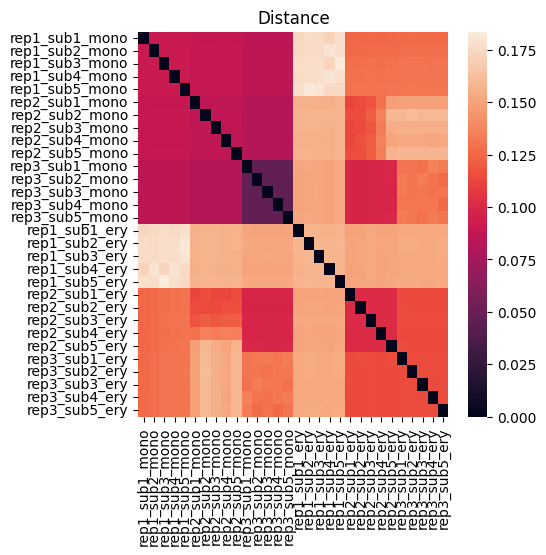

In [28]:
visualise_norms(results_no_dup_hvg_dist_norm, all_labels)


In [29]:
def cluster(dist_norm, labels, linkage, vmins = None, vmaxs = None):
    # dist = [[res[0].dist() if not isinstance(res, int) else 0 for res in res1] for res1 in results]
    # dist_norm = [[res[0].dist_norm() if not isinstance(res, int) else 0 for res in res1] for res1 in results]
    # dist_norm_orig = [[res[0].dist() / (sum(len(x) for x in res[0].path1().values())) if not isinstance(res, int) else 0 for res in res1] for res1 in results]

    # mirror dist_norm_path and dist_norm_orig around the diagonal
    # for i in range(len(dist_norm)):
    #     for j in range(i+1, len(dist_norm)):
    #         dist_norm_orig[j][i] = dist_norm_orig[i][j]
    #         dist[j][i] = dist[i][j]
    #         dist_norm[j][i] = dist_norm[i][j]

    if vmins is None:
        vmins = min([min(row) for row in dist_norm])
    if vmaxs is None:
        vmaxs = max([max(row) for row in dist_norm])

    c1 = sns.clustermap(dist_norm, xticklabels = labels, yticklabels = labels, vmin = vmins, vmax = vmaxs, method = linkage)
    c1.fig.set_size_inches(4, 4)

single


/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


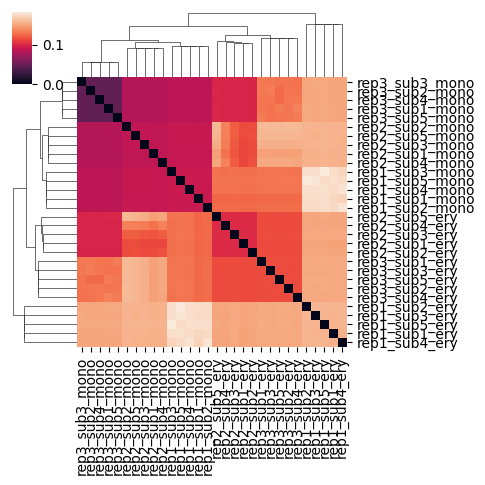

complete


/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


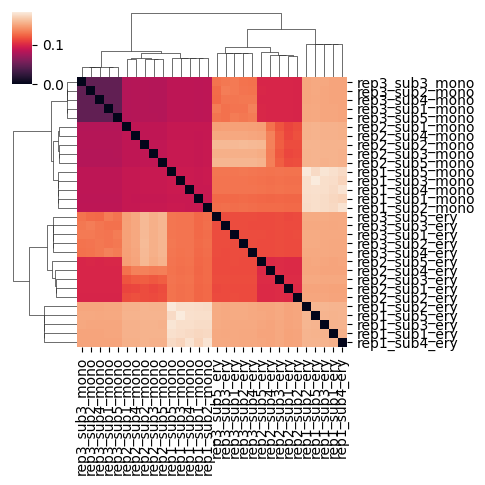

weighted


/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


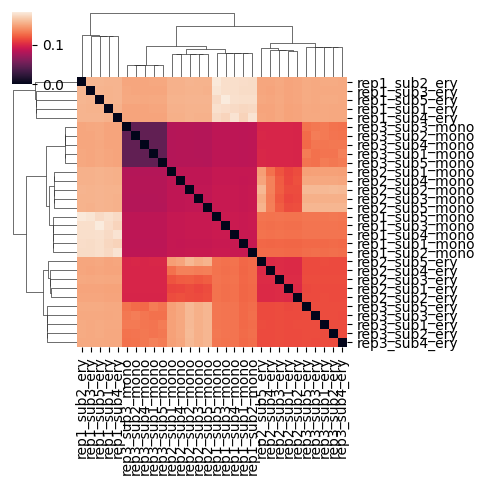

centroid


/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


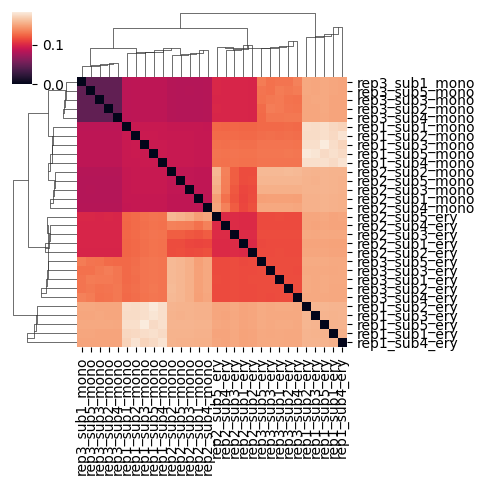

median


/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


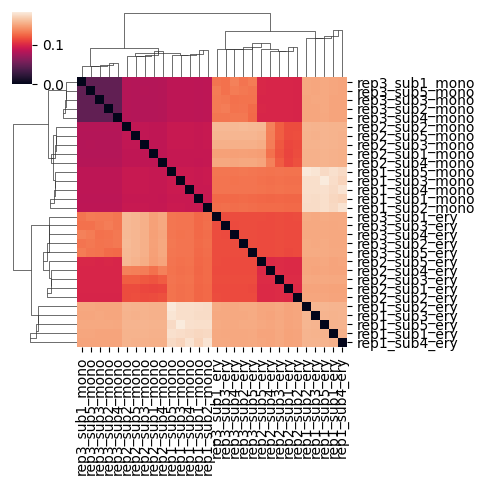

average


/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


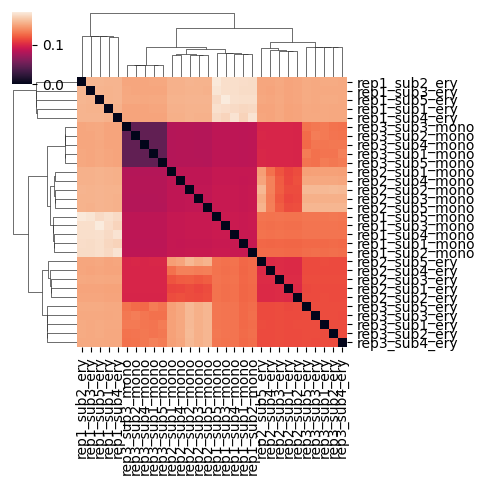

ward


/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/home/louise/Work/dynchro_paper/.venv/lib/python3.12/site-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


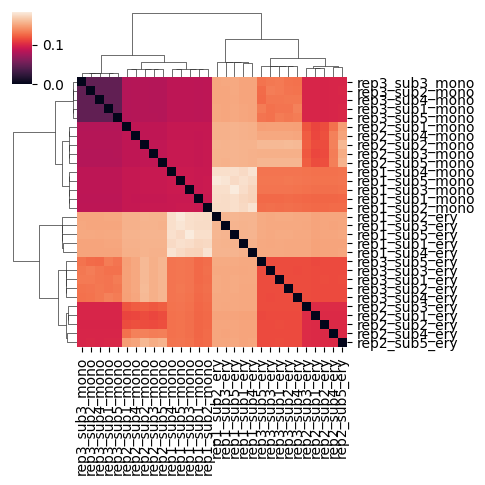

In [34]:
for linkage in ["single", "complete", "weighted", "centroid", "median", "average", "ward"]:
    print(linkage)
    cluster(results_no_dup_hvg_dist_norm, all_labels, linkage)
    plt.show()